## Feature importance

In [36]:
# import needed libraries
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

<AxesSubplot:>

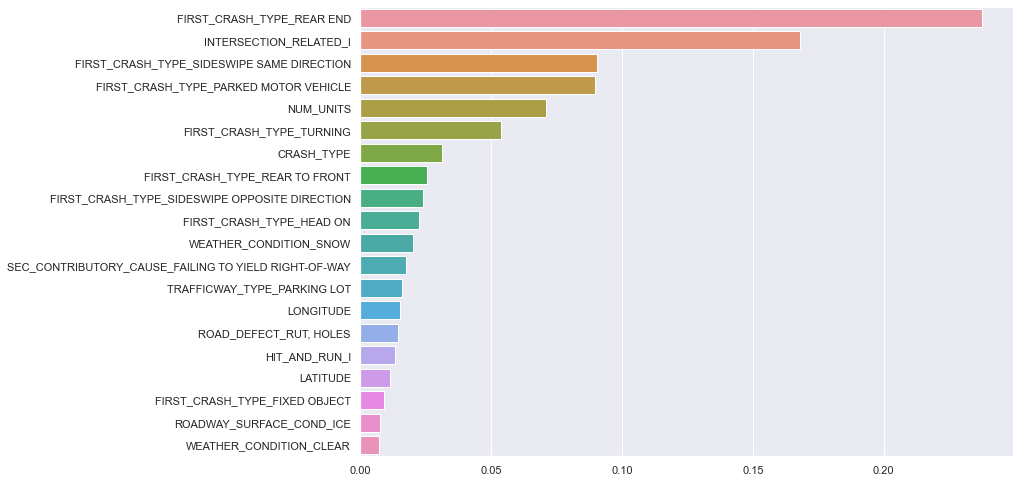

In [37]:
# load data into df
crashes = pd.read_csv('../data/crashes_cleaned.csv', index_col = 0)

# create X and y 
X = crashes.drop(columns = ['PRIM_CONTRIBUTORY_CAUSE', 'CRASH_RECORD_ID'])
y = crashes['PRIM_CONTRIBUTORY_CAUSE']

# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# duplicate best model so far from decision trees notebook
clf_final = DecisionTreeClassifier(max_depth = 11, min_samples_leaf = 39, min_samples_split = 50)
clf_final.fit(X_train, y_train)
y_preds = clf_final.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_preds))

# Print the feature importances
feature_importances = clf_final.feature_importances_

# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(sorted_importances[:20], sorted_feature_names[:20])

The plot above shows the top 20 important features that are the primary cause of car crashes in Chicago.

In [38]:
importance = []
for fi, feature in zip(sorted_importances, sorted_feature_names):
    if fi > 8.610618729477246e-05:
        importance.append((fi, feature))
print(len(importance))
importance

59


[(0.23763908813632792, 'FIRST_CRASH_TYPE_REAR END'),
 (0.16801438004609556, 'INTERSECTION_RELATED_I'),
 (0.09036098756753053, 'FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION'),
 (0.08979894444744815, 'FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE'),
 (0.07095893291516803, 'NUM_UNITS'),
 (0.05370549494928287, 'FIRST_CRASH_TYPE_TURNING'),
 (0.0310622557113885, 'CRASH_TYPE'),
 (0.025321195093311665, 'FIRST_CRASH_TYPE_REAR TO FRONT'),
 (0.02399763897191051, 'FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION'),
 (0.02231434655632134, 'FIRST_CRASH_TYPE_HEAD ON'),
 (0.01999420073528268, 'WEATHER_CONDITION_SNOW'),
 (0.01739859965022658, 'SEC_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY'),
 (0.015986163400461446, 'TRAFFICWAY_TYPE_PARKING LOT'),
 (0.015035889526791028, 'LONGITUDE'),
 (0.014223098519923484, 'ROAD_DEFECT_RUT, HOLES'),
 (0.013068832721261409, 'HIT_AND_RUN_I'),
 (0.011344734569728515, 'LATITUDE'),
 (0.008963076431506428, 'FIRST_CRASH_TYPE_FIXED OBJECT'),
 (0.0074209103657591905, 'ROADWAY_SURFACE

In [39]:
important_features = sorted_feature_names[:74]

In [40]:
crashes = crashes[['PRIM_CONTRIBUTORY_CAUSE', 'FIRST_CRASH_TYPE_REAR END', 'INTERSECTION_RELATED_I',
       'FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION',
       'FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE', 'NUM_UNITS',
       'FIRST_CRASH_TYPE_TURNING', 'CRASH_TYPE',
       'FIRST_CRASH_TYPE_REAR TO FRONT',
       'FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION',
       'WEATHER_CONDITION_SNOW', 'LONGITUDE', 'LATITUDE',
       'FIRST_CRASH_TYPE_HEAD ON',
       'SEC_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY',
       'TRAFFICWAY_TYPE_PARKING LOT', 'HIT_AND_RUN_I',
       'ROAD_DEFECT_RUT, HOLES', 'FIRST_CRASH_TYPE_FIXED OBJECT',
       'WEATHER_CONDITION_CLEAR', 'ROADWAY_SURFACE_COND_ICE',
       'ROADWAY_SURFACE_COND_WET',
       'SEC_CONTRIBUTORY_CAUSE_IMPROPER LANE USAGE',
       'FIRST_CRASH_TYPE_REAR TO SIDE', 'TRAFFICWAY_TYPE_ONE-WAY',
       'SEC_CONTRIBUTORY_CAUSE_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'CRASH_HOUR', 'FIRST_CRASH_TYPE_ANIMAL',
       'FIRST_CRASH_TYPE_PEDALCYCLIST', 'CRASH_MONTH', 'GEO_KMEANS_Cluster',
       'SEC_CONTRIBUTORY_CAUSE_IMPROPER OVERTAKING/PASSING',
       'ROAD_DEFECT_OTHER',
       'SEC_CONTRIBUTORY_CAUSE_EQUIPMENT - VEHICLE CONDITION', 'DAMAGE',
       'SEC_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
       'SEC_CONTRIBUTORY_CAUSE_IMPROPER BACKING',
       'ROADWAY_SURFACE_COND_SNOW OR SLUSH', 'FIRST_CRASH_TYPE_OTHER OBJECT',
       'SEC_CONTRIBUTORY_CAUSE_DISTRACTION - FROM INSIDE VEHICLE',
       'POSTED_SPEED_LIMIT', 'CRASH_DAY_OF_WEEK',
       'LIGHTING_CONDITION_DAYLIGHT',
       'SEC_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY',
       'SEC_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE',
       'SEC_CONTRIBUTORY_CAUSE_NOT APPLICABLE',
       'TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED)',
       'TRAFFICWAY_TYPE_NOT DIVIDED',
       'MOST_SEVERE_INJURY_NO INDICATION OF INJURY',
       'LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD',
       'FIRST_CRASH_TYPE_PEDESTRIAN', 'NOT_RIGHT_OF_WAY_I',
       'SEC_CONTRIBUTORY_CAUSE_DISTRACTION - FROM OUTSIDE VEHICLE',
       'ROAD_DEFECT_UNKNOWN',
       'SEC_CONTRIBUTORY_CAUSE_ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
       'SEC_CONTRIBUTORY_CAUSE_FAILING TO REDUCE SPEED TO AVOID CRASH',
       'ROAD_DEFECT_NO DEFECTS',
       'SEC_CONTRIBUTORY_CAUSE_ROAD CONSTRUCTION/MAINTENANCE',
       'TRAFFICWAY_TYPE_UNKNOWN',
       'SEC_CONTRIBUTORY_CAUSE_DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
       'SEC_CONTRIBUTORY_CAUSE_DRIVING ON WRONG SIDE/WRONG WAY',
       'TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN BARRIER',
       'FIRST_CRASH_TYPE_REAR TO REAR', 'TRAFFICWAY_TYPE_FOUR WAY',
       'SEC_CONTRIBUTORY_CAUSE_CELL PHONE USE OTHER THAN TEXTING',
       'WEATHER_CONDITION_RAIN', 'WEATHER_CONDITION_CLOUDY/OVERCAST',
       'SEC_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER',
       'SEC_CONTRIBUTORY_CAUSE_WEATHER',
       'MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT',
       'SEC_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS',
       'ROAD_DEFECT_WORN SURFACE',
       'SEC_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'LIGHTING_CONDITION_UNKNOWN', 'ALIGNMENT_STRAIGHT AND LEVEL']]

In [41]:
crashes

,PRIM_CONTRIBUTORY_CAUSE,FIRST_CRASH_TYPE_REAR END,INTERSECTION_RELATED_I,FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,NUM_UNITS,FIRST_CRASH_TYPE_TURNING,CRASH_TYPE,FIRST_CRASH_TYPE_REAR TO FRONT,FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION,...,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_CLOUDY/OVERCAST,SEC_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER,SEC_CONTRIBUTORY_CAUSE_WEATHER,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT",SEC_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS,ROAD_DEFECT_WORN SURFACE,"SEC_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",LIGHTING_CONDITION_UNKNOWN,ALIGNMENT_STRAIGHT AND LEVEL
2,BAD DRIVING,0,0,0,1,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
46,BAD DRIVING,0,0,0,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
56,BAD DRIVING,0,0,0,0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
63,BAD DRIVING,0,0,1,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
74,BREAKING LAW,0,1,0,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798899,BAD DRIVING,0,0,0,1,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
798901,DRINKING/DRUGS,0,0,0,0,2,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
798902,BAD DRIVING,0,0,1,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
798904,BREAKING LAW,0,0,0,0,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
# label encoding target variable
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

crashes['PRIM_CONTRIBUTORY_CAUSE'] = label.fit_transform(crashes['PRIM_CONTRIBUTORY_CAUSE'])
crashes

,PRIM_CONTRIBUTORY_CAUSE,FIRST_CRASH_TYPE_REAR END,INTERSECTION_RELATED_I,FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,NUM_UNITS,FIRST_CRASH_TYPE_TURNING,CRASH_TYPE,FIRST_CRASH_TYPE_REAR TO FRONT,FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION,...,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_CLOUDY/OVERCAST,SEC_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER,SEC_CONTRIBUTORY_CAUSE_WEATHER,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT",SEC_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS,ROAD_DEFECT_WORN SURFACE,"SEC_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",LIGHTING_CONDITION_UNKNOWN,ALIGNMENT_STRAIGHT AND LEVEL
2,0,0,0,0,1,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
46,0,0,0,0,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
56,0,0,0,0,0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
63,0,0,0,1,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
74,1,0,1,0,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798899,0,0,0,0,1,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
798901,3,0,0,0,0,2,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
798902,0,0,0,1,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
798904,1,0,0,0,0,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
# create X and y 
X = crashes.drop(columns = 'PRIM_CONTRIBUTORY_CAUSE')
y = crashes['PRIM_CONTRIBUTORY_CAUSE']

# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 11)

# create model and find accuracy
clf_import = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 39, min_samples_split = 50, random_state = 11)
clf_import.fit(X_train, y_train)
y_preds = clf_import.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_preds))

Accuracy: 0.7369475944693517


In [44]:
#  check cross validation
def cross_validation(X_train, y_train, num_split=10):
    score_train_list = []
    score_val_list = []

    for train_index, valid_index in KFold(n_splits=num_split).split(X_train):
        # Train and validation splitting
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

        # Create/fit decision tree classifier
        clf = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 39, min_samples_split = 50)
        clf.fit(X_train_fold, y_train_fold)

        # Evaluate performance
        accuracy_train = clf.score(X_train_fold, y_train_fold)
        accuracy_val = clf.score(X_val_fold, y_val_fold)
        score_val_list.append(accuracy_val)
        score_train_list.append(accuracy_train)

    return {'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

result = cross_validation(X_train, y_train, num_split=10)
print(result)

{'train': 0.7454821547106038, 'validation': 0.7354577895371789}


In [45]:
importance = []
for fi, feature in zip(sorted_importances, sorted_feature_names):
    if fi > 0.0009834654262098404:
        importance.append((fi, feature))
print(len(importance))

39


In [46]:
important_features = sorted_feature_names[:49]
important_features

Index(['FIRST_CRASH_TYPE_REAR END', 'INTERSECTION_RELATED_I',
       'FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION',
       'FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE', 'NUM_UNITS',
       'FIRST_CRASH_TYPE_TURNING', 'CRASH_TYPE',
       'FIRST_CRASH_TYPE_REAR TO FRONT',
       'FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION',
       'FIRST_CRASH_TYPE_HEAD ON', 'WEATHER_CONDITION_SNOW',
       'SEC_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY',
       'TRAFFICWAY_TYPE_PARKING LOT', 'LONGITUDE', 'ROAD_DEFECT_RUT, HOLES',
       'HIT_AND_RUN_I', 'LATITUDE', 'FIRST_CRASH_TYPE_FIXED OBJECT',
       'ROADWAY_SURFACE_COND_ICE', 'WEATHER_CONDITION_CLEAR',
       'SEC_CONTRIBUTORY_CAUSE_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'FIRST_CRASH_TYPE_ANIMAL', 'SEC_CONTRIBUTORY_CAUSE_IMPROPER LANE USAGE',
       'TRAFFICWAY_TYPE_ONE-WAY', 'ROADWAY_SURFACE_COND_WET',
       'ROAD_DEFECT_OTHER', 'ROADWAY_SURFACE_COND_SNOW OR SLUSH',
       'SEC_CONTRIBUTORY_

In [55]:
crashes_20 = crashes[['PRIM_CONTRIBUTORY_CAUSE', 'FIRST_CRASH_TYPE_REAR END', 'INTERSECTION_RELATED_I',
       'FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION',
       'FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE', 'NUM_UNITS',
       'FIRST_CRASH_TYPE_TURNING', 'CRASH_TYPE',
       'FIRST_CRASH_TYPE_REAR TO FRONT',
       'FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION',
       'WEATHER_CONDITION_SNOW', 'LONGITUDE', 'LATITUDE',
       'FIRST_CRASH_TYPE_HEAD ON',
       'SEC_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY',
       'TRAFFICWAY_TYPE_PARKING LOT', 'HIT_AND_RUN_I',
       'ROAD_DEFECT_RUT, HOLES', 'FIRST_CRASH_TYPE_FIXED OBJECT',
       'WEATHER_CONDITION_CLEAR', 'ROADWAY_SURFACE_COND_ICE',
       'ROADWAY_SURFACE_COND_WET',
       'SEC_CONTRIBUTORY_CAUSE_IMPROPER LANE USAGE',
       'FIRST_CRASH_TYPE_REAR TO SIDE', 'TRAFFICWAY_TYPE_ONE-WAY',
       'SEC_CONTRIBUTORY_CAUSE_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'CRASH_HOUR', 'FIRST_CRASH_TYPE_ANIMAL']]

In [56]:
# create X and y 
X = crashes_20.drop(columns = 'PRIM_CONTRIBUTORY_CAUSE')
y = crashes_20['PRIM_CONTRIBUTORY_CAUSE']

# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 11)

clf_import = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 39, min_samples_split = 50, random_state = 11)
clf_import.fit(X_train, y_train)
y_preds = clf_import.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_preds))

Accuracy: 0.7349809742681687


Not much of a positive change after feature reduction.